In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
from google.colab import files
upload=files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


In [36]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [39]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
df['Score'].nunique()

84

In [41]:
df['Score'].value_counts()

,count
Score,
42,8
55,7
73,6
46,6
48,5
...,...
68,1
85,1
23,1


In [42]:
df['Income'].nunique()

64

In [43]:
df['Income'].value_counts()

,count
Income,
54,12
78,12
60,6
48,6
63,6
...,...
101,2
113,2
120,2


In [44]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Score,0


In [45]:
df.drop(['CustomerID'], axis=1, inplace=True, errors='ignore')

<Axes: >

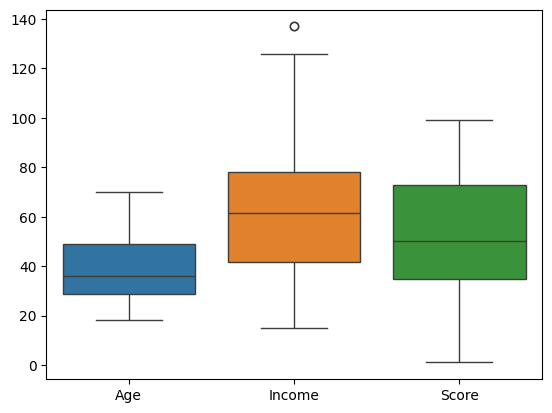

In [46]:
sns.boxplot(df)

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
df['Gender'] = ohe.fit_transform(df[['Gender']])[:, 0]

In [48]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
df=sc.fit_transform(df)
df=pd.DataFrame(df)
df.columns=['Gender','Age','Income','Score']
df

,Gender,Age,Income,Score
0,1.0,-0.839506,-1.273973,-0.287582
1,1.0,-0.740741,-1.273973,0.810458
2,0.0,-0.790123,-1.246575,-1.150327
3,0.0,-0.641975,-1.246575,0.705882
4,0.0,-0.246914,-1.219178,-0.261438
...,...,...,...,...
195,0.0,-0.049383,1.602740,0.758170
196,0.0,0.444444,1.767123,-0.575163
197,1.0,-0.197531,1.767123,0.627451
198,1.0,-0.197531,2.068493,-0.836601


In [49]:
X=df

In [50]:
wcss=[]
for k in range(1,11):
  from sklearn.cluster import KMeans
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
print(wcss)

[337.7211135777367, 239.92960480139143, 192.03883629041906, 147.9667819894255, 130.88131158154843, 113.96986852939972, 105.73465547382803, 99.56824953153088, 81.75195367660429, 73.23004706590201]


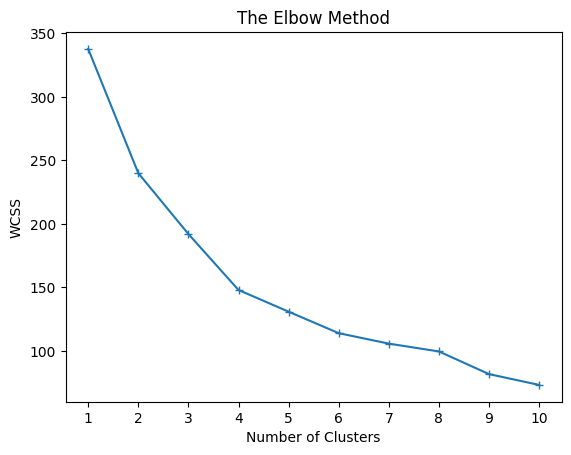

In [51]:
plt.plot(range(1,11),wcss,marker='+')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=True)
X['KMeans_Clusters']=kmeans.fit_predict(X)

In [53]:
X

,Gender,Age,Income,Score,KMeans_Clusters
0,1.0,-0.839506,-1.273973,-0.287582,2
1,1.0,-0.740741,-1.273973,0.810458,2
2,0.0,-0.790123,-1.246575,-1.150327,0
3,0.0,-0.641975,-1.246575,0.705882,2
4,0.0,-0.246914,-1.219178,-0.261438,0
...,...,...,...,...,...
195,0.0,-0.049383,1.602740,0.758170,3
196,0.0,0.444444,1.767123,-0.575163,1
197,1.0,-0.197531,1.767123,0.627451,3
198,1.0,-0.197531,2.068493,-0.836601,1


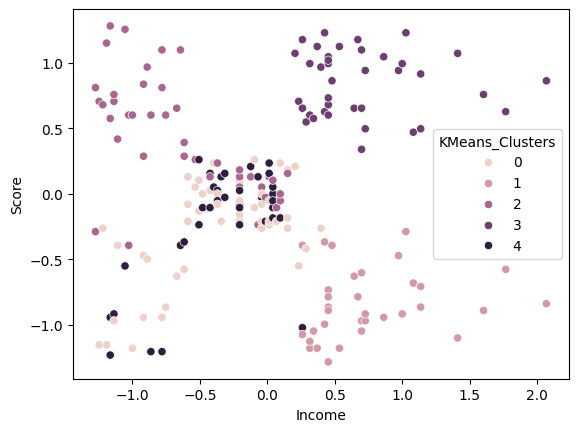

In [54]:
sns.scatterplot(x='Income', y='Score', hue='KMeans_Clusters', data=X)
plt.show()

In [55]:
kmeans = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
)

df['KMeans_Cluster'] = kmeans.fit_predict(X)


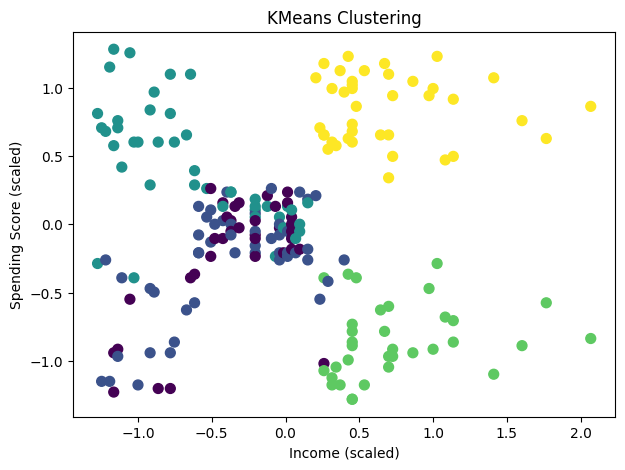

In [56]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['Income'],
    df['Score'],
    c=df['KMeans_Cluster'],
    s=50
)
plt.xlabel('Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('KMeans Clustering')
plt.show()


In [57]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5,covariance_type='full',
                    random_state=42,n_init=10)
df['GMM_Cluster']=gmm.fit_predict(X)

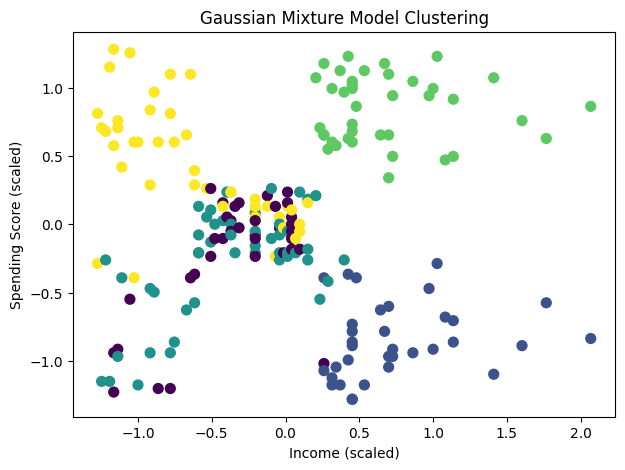

In [58]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['Income'],
    df['Score'],
    c=df['GMM_Cluster'],
    s=50
)
plt.xlabel('Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

In [59]:
aic=[]
bic=[]
ks=range(1,11)
for k in ks:
  gmm=GaussianMixture(n_components=k,
                      covariance_type='full',
                      random_state=42)
  gmm.fit(X)
  aic.append(gmm.aic(X))
  bic.append(gmm.bic(X))

In [60]:
gmm.n_iter_

7

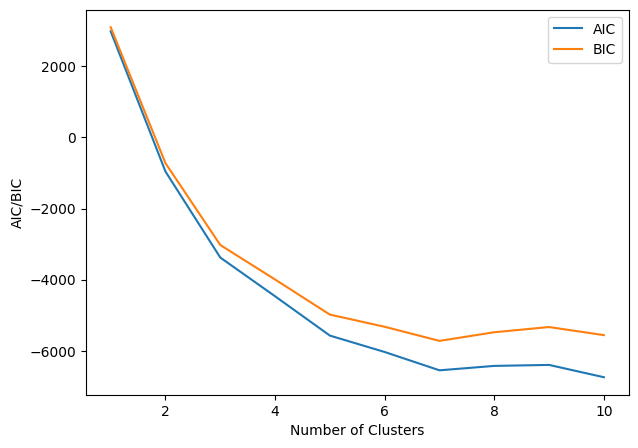

In [61]:
plt.figure(figsize=(7,5))
plt.plot(ks,aic,label='AIC')
plt.plot(ks,bic,label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC/BIC')
plt.legend()
plt.show()


In [62]:
probs=gmm.predict_proba(X)
probs[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [63]:
log_probs=gmm.score_samples(X)

In [64]:
threshold=np.percentile(log_probs,5)

In [65]:
df['Anamoly']=log_probs<threshold

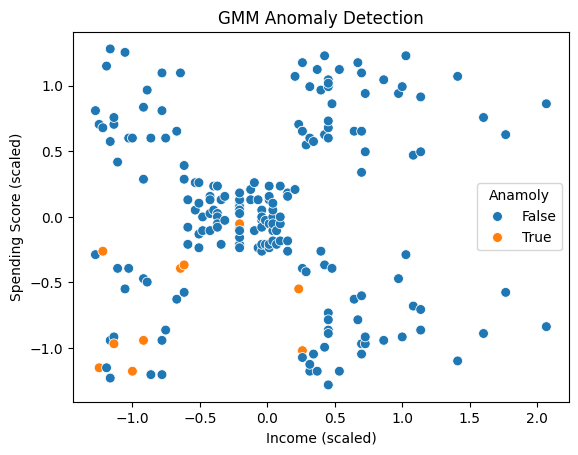

In [66]:
sns.scatterplot(x='Income', y='Score', hue='Anamoly', data=df, s=50)
plt.xlabel('Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('GMM Anomaly Detection')
plt.show()

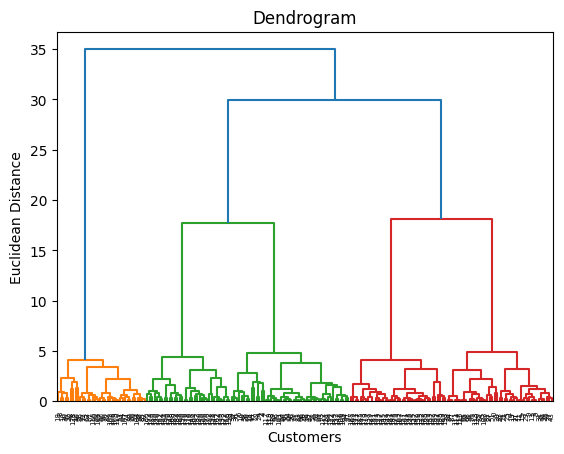

In [68]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(X,method='ward')
dendrogram=sch.dendrogram(data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
X['H_clusters']=hc.fit_predict(X)

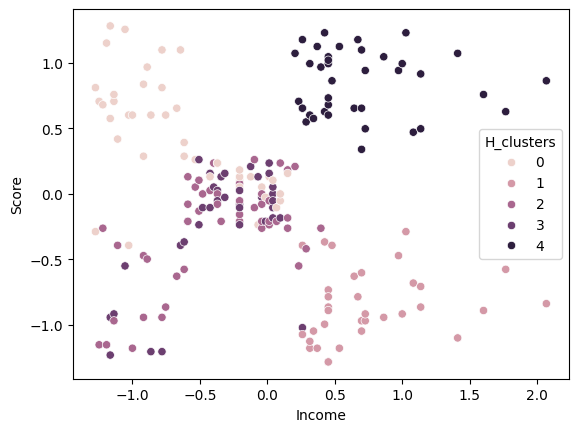

In [71]:
sns.scatterplot(x='Income', y='Score', hue='H_clusters', data=X)
plt.show()

In [76]:
for r in range(1,10):
  for m in range(3,10):
    from sklearn.cluster import DBSCAN
    dbs=DBSCAN(eps=r,min_samples=m)
    X['DB_clusters']=dbs.fit_predict(X)

  if X['DB_clusters'].nunique()==5:
    break
print('eps',r)
print('min',m)

eps 9
min 9


In [77]:
dbs=DBSCAN(eps=9,min_samples=9)
X['DB_clusters']=dbs.fit_predict(X)

In [79]:
X['DB_clusters'].unique()

array([0])

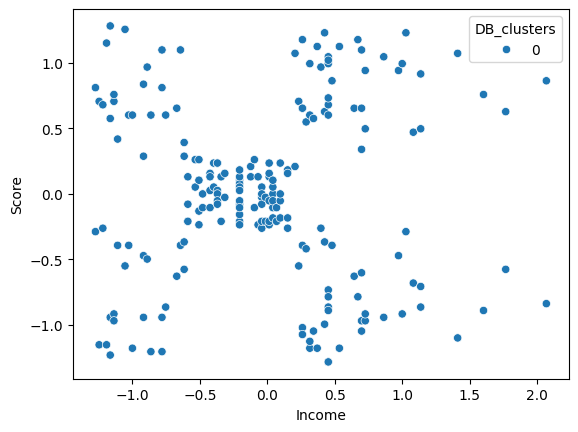

In [80]:
sns.scatterplot(x='Income', y='Score', hue='DB_clusters', data=X)
plt.show()

To find suitable `eps` and `min_samples` values for DBSCAN to potentially identify 5 clusters, we can use a k-distance graph. This helps visualize the distances to the k-nearest neighbor for each point, and a sharp bend in the graph can suggest an appropriate `eps` value. A common heuristic for `min_samples` is `2 * number_of_features`. In your case, you have 4 features (Gender, Age, Income, Score).

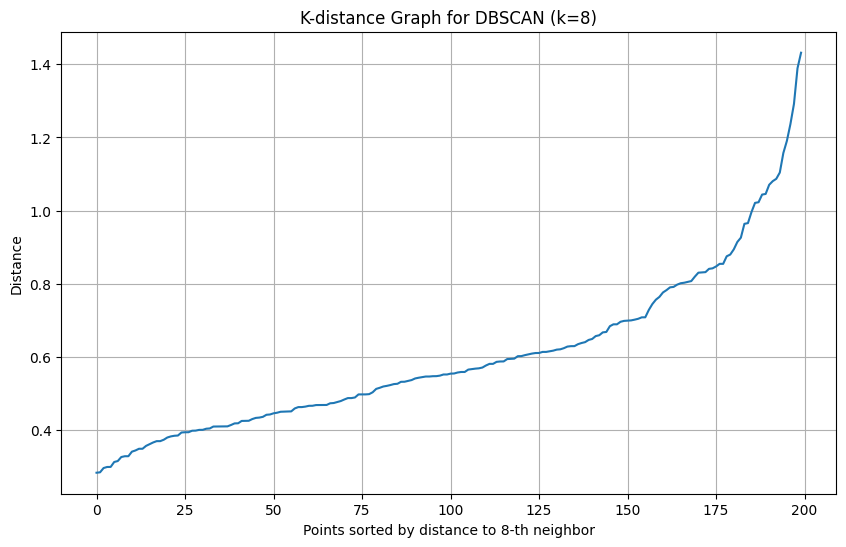

In [81]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculate distances to the 4th nearest neighbor (min_samples = 2 * 4 features = 8, so let's try 2*num_features)
# Let's start with a k of 2 * dimensions = 2*4 = 8. So we'll look at the 8th nearest neighbor.
k = 8 # min_samples parameter, usually 2 * number_of_dimensions

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X.drop(columns=['KMeans_Clusters', 'KMeans_Cluster', 'GMM_Cluster', 'Anamoly', 'H_clusters', 'DB_clusters'], errors='ignore'))
distances, indices = neigh.kneighbors(X.drop(columns=['KMeans_Clusters', 'KMeans_Cluster', 'GMM_Cluster', 'Anamoly', 'H_clusters', 'DB_clusters'], errors='ignore'))

# Sort distances to the k-th neighbor
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance to {}-th neighbor'.format(k))
plt.ylabel('Distance')
plt.title('K-distance Graph for DBSCAN (k={})'.format(k))
plt.grid(True)
plt.show()

After inspecting the k-distance graph, you can identify an 'elbow' point, which suggests a good `eps` value. Then you can rerun DBSCAN with chosen `eps` and `min_samples` (e.g., `min_samples=8` as used for the graph or adjusted based on dataset characteristics) and check the number of clusters. Let's try an `eps` of 0.2 and `min_samples` of 8 as a starting point, then we can adjust based on the k-distance graph.

Number of clusters found: 5
Unique clusters: [-1  0  1  2  3]


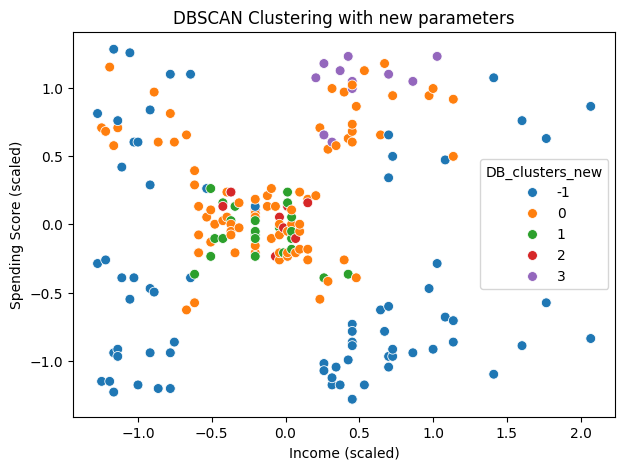

In [83]:
from sklearn.cluster import DBSCAN

# Re-run DBSCAN with more appropriate parameters based on the k-distance graph or heuristics
dbs = DBSCAN(eps=0.5, min_samples=8) # TODO: Adjust eps based on the k-distance plot

X['DB_clusters_new'] = dbs.fit_predict(X.drop(columns=['KMeans_Clusters', 'KMeans_Cluster', 'GMM_Cluster', 'Anamoly', 'H_clusters', 'DB_clusters'], errors='ignore'))

print('Number of clusters found:', X['DB_clusters_new'].nunique())
print('Unique clusters:', X['DB_clusters_new'].unique())

# Visualize the new DBSCAN clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x='Income', y='Score', hue='DB_clusters_new', data=X, s=50, palette='tab10')
plt.xlabel('Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('DBSCAN Clustering with new parameters')
plt.show()

# Task
The data in the `df` DataFrame has been scaled using `RobustScaler`. This was performed in a previous step where `RobustScaler` was applied to the DataFrame, and the scaled data was then reassigned back to `df`, with the columns renamed to 'Gender', 'Age', 'Income', and 'Score'.

## Confirm Data Scaling

### Subtask:
Confirm that the data in the DataFrame `df` has been scaled using `RobustScaler` by checking the execution history and the state of the `df` variable.


**Reasoning**:
The subtask asks to display the first few rows of the `df` DataFrame to observe the scaled values and renamed columns. This command will fulfill that requirement.



In [84]:
df.head()

,Gender,Age,Income,Score,KMeans_Clusters,KMeans_Cluster,GMM_Cluster,Anamoly,H_clusters,DB_clusters,DB_clusters_new
0,1.0,-0.839506,-1.273973,-0.287582,2,2,4,False,0,0,-1
1,1.0,-0.740741,-1.273973,0.810458,2,2,4,False,0,0,-1
2,0.0,-0.790123,-1.246575,-1.150327,0,1,2,True,2,0,-1
3,0.0,-0.641975,-1.246575,0.705882,2,2,4,False,0,0,0
4,0.0,-0.246914,-1.219178,-0.261438,0,1,2,True,2,0,-1


**Reasoning**:
To verify that the scaling has been applied, I will display the descriptive statistics of the `df` DataFrame using `df.describe()` and check for medians close to 0 and interquartile ranges close to 1, which are characteristics of `RobustScaler`.



In [85]:
df.describe()

,Gender,Age,Income,Score,KMeans_Clusters,KMeans_Cluster,GMM_Cluster,H_clusters,DB_clusters,DB_clusters_new
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,0.440000,0.140741,-0.025753,0.005229,1.905000,1.960000,2.095000,1.970000,0.0,0.030000
std,0.497633,0.689828,0.719581,0.675125,1.430457,1.384915,1.394885,1.413894,0.0,1.106899
min,0.000000,-0.888889,-1.273973,-1.281046,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,0.000000,-0.358025,-0.547945,-0.398693,1.000000,1.000000,1.000000,1.000000,0.0,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.000000
75%,1.000000,0.641975,0.452055,0.601307,3.000000,3.000000,3.000000,3.000000,0.0,0.000000
max,1.000000,1.679012,2.068493,1.281046,4.000000,4.000000,4.000000,4.000000,0.0,3.000000


## Final Task

### Subtask:
Summarize the current state of the data regarding scaling and respond to the user's inquiry.


## Summary:

### Q&A
The data in the `df` DataFrame has indeed been scaled using `RobustScaler`, and its columns have been renamed to 'Gender', 'Age', 'Income', and 'Score'.

### Data Analysis Key Findings
*   The DataFrame columns were successfully renamed to 'Gender', 'Age', 'Income', and 'Score'.
*   For the 'Age', 'Income', and 'Score' columns, the median (50th percentile) is exactly $0.000000$.
*   The Interquartile Range (IQR), calculated as the difference between the 75th and 25th percentiles, for 'Age', 'Income', and 'Score' is exactly $1.000000$. These specific characteristics confirm the application of `RobustScaler`.
*   The 'Gender' column contains values of $0$ and $1$, which is consistent with a scaled binary feature.

### Insights or Next Steps
*   The dataset is now standardized, making it suitable for machine learning models that are sensitive to feature scales.
*   Proceed with model training or further analysis, leveraging the robustness of the scaling against outliers.
